In [1]:
import json
import pandas as pd
import numpy as np
import re


In [3]:
file_dir = "C:/Users/tsanzo/Documents/Data Camp/Movies ETL/"

In [2]:
with open('wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)


In [3]:
kaggle_metadata_df = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv('ratings.csv')


In [6]:
kaggle_metadata_df.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
23202,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,45588,tt0043286,en,Angels in the Outfield,"Paul Douglas, stars with Janet Leigh, as the h...",...,1951-10-19,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The toughest guy you ever met ... until an ang...,Angels in the Outfield,False,6.0,7.0
37910,False,NaN,0,[],NaN,348396,tt4419794,en,Ave Maria,The silent routine of 5 Nuns living in the Wes...,...,2015-05-18,0.0,15.0,[],Released,NaN,Ave Maria,False,5.8,10.0
22724,False,"{'id': 2704, 'name': 'The Bible Collection', '...",0,"[{'id': 14, 'name': 'Fantasy'}]",NaN,58427,tt0117547,en,Samson and Delilah,Mara and Manoa are both upstanding and religio...,...,1996-12-08,0.0,172.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Samson and Delilah,False,4.8,4.0
18289,False,"{'id': 87359, 'name': 'Mission: Impossible Col...",145000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.missionimpossible.com/,56292,tt1229238,en,Mission: Impossible - Ghost Protocol,In the 4th installment of the Mission Impossib...,...,2011-12-07,694713380.0,133.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No Plan. No Backup. No Choice.,Mission: Impossible - Ghost Protocol,False,6.8,4026.0
33110,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,103066,tt1584828,ja,Ushiro kara mae kara,Sexy Momoko turns tricks in her taxi to boost ...,...,2010-02-27,0.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Any And Every Which Way,False,4.5,2.0


In [4]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [5]:
#filtering df to movies in wiki data that have a director and an IMDB link and isn't a tv show

wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie
                and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [6]:


wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df)

7076

## 8.3.5 Using Functions to clean data

In [7]:
#return a copy of movie
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
     # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie



In [8]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [9]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())


['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## 8.3.7 Remove Duplicate Rows based on IMDB link

In [10]:
#extracting imdb ID from imdb link column

wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

#dropping duplicates

wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)

In [11]:
#check for columns with majority null values

wiki_movies_df.isna().sum().sort_values(ascending=False)

Color process             7032
Suggested by              7032
Venue                     7032
Recorded                  7031
Animation by              7031
Label                     7031
Voices of                 7031
Followed by               7024
Preceded by               7023
Created by                7023
alt_titles                7012
Production location(s)    6986
Audio format              6972
Picture format            6969
Executive producer(s)     6936
Genre                     6923
Original network          6908
Original language(s)      6875
Narrated by               6752
Based on                  4852
Budget                    2295
Production company(s)     1678
Box office                1548
Cinematography             691
Editor(s)                  548
Composer(s)                518
Distributor                357
Language                   244
Country                    236
Producer(s)                202
Writer(s)                  199
Starring                   184
Running 

In [12]:
#keep columns with <90% null values

wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isna().sum() < len(wiki_movies_df)*.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]


In [13]:
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,$41.9 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,$76.1 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,$38.4 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastia

## 8.3.8 Plan to convert and parse data

In [14]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [19]:
#columns to convert 
# Box office should be numeric.
# Budget should be numeric.
# Release date should be a date object.
# Running time should be numeric.




In [15]:
box_office = wiki_movies_df['Box office'].dropna()

In [16]:
#ensuring data is a string so regex can be used

def is_not_a_string(x):
    return type(x) != str

In [17]:
#using lambda instead

box_office[box_office.map(lambda x : type(x) != str)]



34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [18]:
#as we can see the values returned as non string types are lists so we will update the function to join lists into strings
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

box_office


0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

## 8.3.10 Parse box office data using regex

In [19]:
# Creating regular expression to check for 6 elements
# A dollar sign
# An arbitrary (but non-zero) number of digits
# An optional decimal point
# An arbitrary (but possibly zero) number of more digits
# A space (maybe more than one)
# The word "million" or "billion"

form_one = r'\$\d+\.?\d*\s*[mb]illion'

# form equates to $123.4 million/billion

In [20]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

#use ignorecase to ignore uppper/lowercase and na = false to ignore non string data




3896

In [21]:
#second form to match type "$123,456,789."

form_two = r'\$\d{1,3}(?:,\d{3})+'  
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()


1544

In [22]:
#comparing the two matches
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

#set of values outside of both matches
box_office[~matches_form_one &  ~matches_form_two]



34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [23]:
#Fix pattern matches to match remaining values

#accounting for spaces between dollar sign and number using \s*

form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

#some values use period instead of comma as thou separator
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

#using negative look ahead so form two does not include values with 'billion' or 'million'

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

#fixing values given as a range. replaces first value with $ so highest(second) value of range is kept
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

#million is sometimes misspelled as millon
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'


In [24]:
# Extract and Convert the Box Office Values
box_office.str.extract(f'({form_one}|{form_two})')


,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [25]:
#function to parse box office values into numeric values
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s)*10**6

        # return value
        return value
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s)*10**9

        # return value
        return value
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [26]:



wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [27]:
wiki_movies_df.box_office

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [28]:
#dropping old box office column 
wiki_movies_df.drop('Box office', axis=1, inplace=True)


## 8.3.11 Parse Budget Data

In [29]:
budget = wiki_movies_df['Budget'].dropna()

#Convert any lists to strings:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

#remove any values between a dollar sign and a hyphen 
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

#use expressions already created for box office to find budgets not collected by expression
matches_form_one_budget = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two_budget = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one_budget & ~matches_form_two_budget]




136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [30]:
#removing citation references (square brackets) 

budget = budget.str.replace(r'\[\d+\]\s*', '')
matches_form_one_budget = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two_budget = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one_budget & ~matches_form_two_budget]



<ipython-input-30-725035ae9918>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [31]:
#replacing old budget column with reformatted column

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)


In [32]:
#Parsing release data data
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


In [33]:
#Formats to match:

# Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# Full month name, four-digit year (i.e., January 2000)
# Four-digit year

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'   


In [34]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [35]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


In [36]:
#Parsing run time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


In [37]:
len(running_time)

6894

In [38]:
#Testing how many values are in form 'xxx minutes'
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()



6528

In [39]:
#6528 match above form, checking what other values look like

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True].tolist()


['102 min',
 '93 min',
 '32 min.',
 '101 min',
 '97 min',
 '91 min.',
 '91 min.',
 '82 min',
 '192 minutes (original version) [1] 187 minutes (DVD/Blu-ray version)',
 '106 min.',
 '93 min.',
 '98 min.',
 '115 min.',
 '85 mins',
 '120 min.',
 '94 min.',
 '97 min.',
 '87 min',
 '91 mins.',
 '103 min.',
 '200 minutes (broadcast) 138 minutes (theatrical)',
 '88 min.',
 '101 min.',
 '104 min.',
 '107 min.',
 '92 min.',
 '95 min',
 "188 minutes [1] 206 minutes (director's cut)",
 '112 min.',
 '89 min.',
 '106 min.',
 '95 min.',
 '95 min.',
 '89 min.',
 '91 min.',
 '120 min.',
 '95 mins.',
 '107 min.',
 '187 min.',
 '96 min.',
 '106 minutes (UK) [2] 125 minutes (USA)',
 '105 minutes 116 minutes (international cut)',
 "108 minutes 141 minutes (director's cut)",
 "84 minutes (theatrical) 91 minutes (unrated director's cut)",
 '95 minutes [1] 92 minutes [2] (Edited cut)',
 '84 min',
 '87 min',
 '23 min.',
 '57 min.',
 '96 min.',
 '87 min',
 '95 min.',
 '82 mins',
 '96 min.',
 '87 min.',
 '69  mi

In [40]:
#editing string match to capture more by using 'm' instead of minutes

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()


6877

In [41]:
#capturing more values by removing the start with '^' operator. this way we can parse matches that are contained 
#not at the beginning of the value

running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False).sum()


6891

In [42]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True].tolist()


['25 : 03', 'varies', '4 hours']

In [43]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')


running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)


In [44]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)


In [46]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    7033 non-null   object        
 1   year                   7033 non-null   int64         
 2   imdb_link              7033 non-null   object        
 3   title                  7032 non-null   object        
 4   Based on               2181 non-null   object        
 5   Starring               6849 non-null   object        
 6   Cinematography         6342 non-null   object        
 7   Release date           7001 non-null   object        
 8   Country                6797 non-null   object        
 9   Language               6789 non-null   object        
 10  Director               7033 non-null   object        
 11  Distributor            6676 non-null   object        
 12  Editor(s)              6485 non-null   object        
 13  Com

## Cleaning Kaggle Data 8.3.12

In [47]:
kaggle_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [52]:
#Converting data types

#Check values for each column to convert

kaggle_metadata_df.adult.value_counts().to_frame()

,adult
False,45454
True,9
- Written by Ørnås,1
Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.,1
Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.,1


In [48]:
#Removing bad data

kaggle_metadata_df[~kaggle_metadata_df.adult.isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Only keeping records for adult = false
kaggle_metadata_df = kaggle_metadata_df[kaggle_metadata_df['adult'] == 'False']
kaggle_metadata_df.adult.replace('False', bool(''), inplace= True)
kaggle_metadata_df['adult']


Series([], Name: adult, dtype: bool)

In [55]:
#Looking at video column
kaggle_metadata_df.video.value_counts()

False    45358
True        93
Name: video, dtype: int64

In [56]:
#Converting all video values to true

kaggle_metadata_df['video'] = kaggle_metadata_df['video'] == 'True'



In [57]:
kaggle_metadata_df.adult=kaggle_metadata_df.adult.astype(bool)

In [58]:
#Converting all numeric columns needing conversion

kaggle_metadata_df['budget'] = kaggle_metadata_df['budget'].astype(int)
kaggle_metadata_df['id'] = pd.to_numeric(kaggle_metadata_df['id'], errors='raise')
kaggle_metadata_df['popularity'] = pd.to_numeric(kaggle_metadata_df['popularity'], errors='raise')


In [59]:
#converting date column

kaggle_metadata_df['release_date'] = pd.to_datetime(kaggle_metadata_df['release_date'])


### Reasonability Checks on Ratings Data


In [60]:
ratings_df.info(null_counts=True)

<ipython-input-60-81bfa3a45ca1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings_df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [61]:
#Converting timestamp column 

pd.to_datetime(ratings_df['timestamp'], unit='s')


0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [62]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

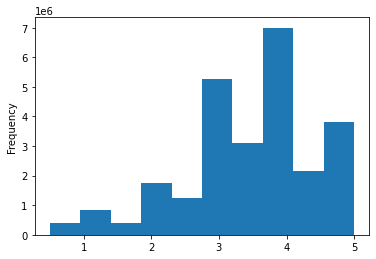

In [63]:
#Checking summary statistics of rating data

pd.options.display.float_format = '{:20,.2f}'.format
ratings_df['rating'].plot(kind='hist')
ratings_df['rating'].describe()

In [64]:
## 8.4.1 Merging Wiki and Kaggle data

movies_df = pd.merge(wiki_movies_df, kaggle_metadata_df, on='imdb_id', suffixes=['_wiki','_kaggle'])



movies_df.tail()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,A Fantastic Woman,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Spanish,...,2017-04-06,0.00,104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,Permission,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,English,...,2017-04-22,0.00,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Russian,...,2017-06-01,0.00,128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,Gemini,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,English,...,2017-03-12,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00
6051,https://en.wikipedia.org/wiki/How_to_Talk_to_G...,2018,https://www.imdb.com/title/tt3859310/,How to Talk to Girls at Parties,"["", How to Talk to Girls at Parties, "", by, Ne...","[Elle Fanning, Alex Sharp, Nicole Kidman, Ruth...",Frank G. DeMarco,"[May 21, 2017, (, 2017-05-21, ), (, Cannes, ),...","[United Kingdom, United States]",English,...,2017-12-27,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some girls are out of this world.,How to Talk to Girls at Parties,False,0.00,10.00


In [65]:
#There are 7 redundant columns so we want to figure out how best to correct this


# Competing data:
# Wiki                     Movielens (kaggle data)               Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [66]:
#Looking at titles

movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [67]:
#Checking which titles dont match

movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]


,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [68]:
#Kaggle titles look a bit better but lets make sure kaggle isn't missing any titles

movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [69]:
#No titles returned so we can drop wiki titles

movies_df.drop('title_wiki', axis= 1, inplace=True)

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

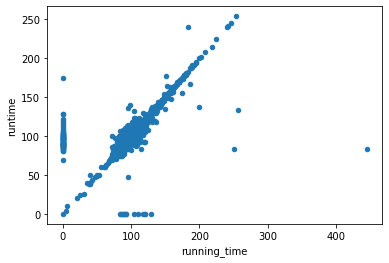

In [70]:
# Next lets check run time columns

#Using scatter plot to see how similar values are to each other

movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')


In [71]:
#More 0 values for running time which is wiki data so we will keep the kaggle data 
#and fill in the missing kaggle data with wiki data


movies_df[movies_df.runtime == 0].fillna(movies_df.running_time)

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
33,https://en.wikipedia.org/wiki/Crash_and_Burn_(...,1990,https://www.imdb.com/title/tt0099313/,NaN,"[Paul Ganus, Megan Ward, Jack McGee, Eva LaRue]",Mark Ahlberg,"[September 1990, (, 1990-09, )]",United States,English,Charles Band,...,1990-01-01,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Crash and Burn,False,4.70,7.00
933,https://en.wikipedia.org/wiki/Shatter_Dead,1994,https://www.imdb.com/title/tt0111159/,NaN,"[Stark Raven, Flora Fauna, Daniel 'Smalls' Joh...",Matthew M. Howe,"[1994, (, 1994, )]",United States,English,Scooter McCrae,...,1994-12-13,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Shatter Dead,False,4.00,2.00
1324,https://en.wikipedia.org/wiki/Fever_Lake,1996,https://www.imdb.com/title/tt0116299/,NaN,"[Corey Haim, Mario López, Bo Hopkins]",NaN,"[1996, (, 1996, )]",NaN,English,Rafe M. Portilo,...,1996-01-01,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The evil is coming!,Fever Lake,False,2.80,4.00
1441,https://en.wikipedia.org/wiki/The_Proprietor,1996,http://imdb.com/title/tt0117400/,NaN,"[Jeanne Moreau, Sean Young, Sam Waterston, Chr...",Larry Pizer,"[9 October 1996, (, 1996-10-09, )]","[United States, France]","[English, French]",Ismail Merchant,...,1996-09-09,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Proprietor,False,0.00,0.00
1489,"https://en.wikipedia.org/wiki/To_Sir,_with_Lov...",1996,https://www.imdb.com/title/tt0117927/,"[Characters from, E. R. Braithwaite, 's book,,...","[Sidney Poitier, Christian Payton, Dana Eskelson]",William Birch,"[April 7, 1997, (, 1997-04-07, ), (United Stat...",United States,NaN,Peter Bogdanovich,...,1996-04-07,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"To Sir, with Love II",False,5.80,15.00
1563,https://en.wikipedia.org/wiki/Broadway_Damage,1997,https://www.imdb.com/title/tt0118780/,NaN,"[Mara Hobel, Michael Lucas, Hugh Panaro, Aaron...",Michael Mayers,"[August 26, 1997, (, 1997-08-26, )]",United States,English,Victor Mignatti,...,1997-08-26,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Broadway Damage,False,6.00,1.00
1652,https://en.wikipedia.org/wiki/Keeping_the_Promise,1997,https://www.imdb.com/title/tt0119454/,NaN,"[Keith Carradine, Annette O'Toole, Brendan Fle...",Ron Stannett,"[1997, (, 1997, )]",NaN,English,Sheldon Larry,...,1997-01-05,0.00,0.00,[],Released,NaN,Keeping the Promise,False,0.00,0.00
1992,https://en.wikipedia.org/wiki/Thick_as_Thieves...,1998,https://www.imdb.com/title/tt0147599/,"[Thick as Thieves, by, Patrick Quinn]","[Alec Baldwin, Michael Jai White, Rebecca De M...",NaN,"[January 28, 1999, (, 1999-January-28, ), (Uni...",United States,English,Scott Sanders,...,1999-04-09,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Thick as Thieves,False,5.30,12.00
2267,https://en.wikipedia.org/wiki/For_Love_or_Coun...,2000,https://www.imdb.com/title/tt0236285/,NaN,"[Andy García, Mía Maestro, Gloria Estefan, Dav...",Donald M. Morgan,"[November 18, 2000, (, 2000-11-18, )]",United States,NaN,Joseph Sargent,...,2000-11-18,0.00,0.00,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,NaN,For Love or Country: The Arturo Sandoval Story,False,6.30,3.00
2645,https://en.wikipedia.org/wiki/Chat_Room_(film),2002,https://www.imdb.com/title/tt0306877/,NaN,"[Brian Hooks, Christopher Richards, Deya Simon...",Jonathon Millman,"[July 2, 2002, (, 2002-07-02, )]",United States,English,Barry Bowles,...,2002-01-01,0.00,0.00,[],Released,NaN,The Chatroom,False,0.00,0.00
